# Interpolation Tools Quality Check

The code below will use the interpolation functions for data sets that relate $\% H_2SO_4$ to $H_0$, $H_R$, $a_{H_2O}$, and density and plot the iterpolation function vs the actual data. Hopefully the two will line up.

In [ ]:
##############################################################
### Set up libraries and global variables
##############################################################

H0_Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"
HR_Data_File_Name = "04_Deno_1955_HR_Values.csv"
aH2O_Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"
Density_Data_File_Name = "03_H2SO4_PercentWt_to_MolarConc_CRC.csv"
#Density_Data_File_Name = "03_H2SO4_PercentWt_to_MolarConc.csv"

Filenames_Dictionary = {"H0":H0_Data_File_Name,
                         "HR":HR_Data_File_Name,
                         "aH2O":aH2O_Data_File_Name,
                         "Density":Density_Data_File_Name
                         }

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import interpolators            # The external library with the interpolators. Will not work in Google Colab
                                 # If you are using Google Colab then un the code in the last block of this 
                                 # workbook first to set up the interpolator functions.
                                 # If you are running from a cloned repository then uncomment the import statement.

#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_styles = "./styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"



aH2O


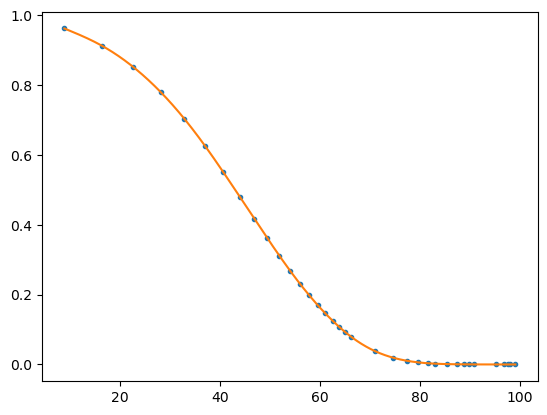

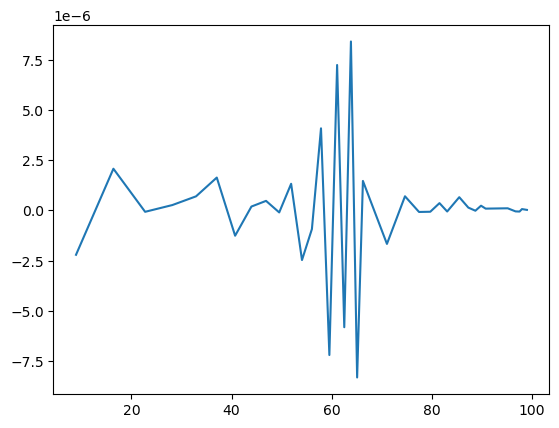

In [5]:
### IMPORTANT: RUN THE CODE BLOCK AT THE END OF THIS NOTEBOOK TO LOAD THE INTERPOLATION LIBRARY

##############################################################
### Import the data and interpolator
##############################################################

Parameter = "aH2O"    ### Use "H0" or "HR" or "aH2O" or "Density"

Data_File_Name = Filenames_Dictionary[Parameter]   
Filename = github_location + Data_File_Name

df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

#interpolator = interpolators.select_interpolator(Parameter)    # For running off local cloned repository
interpolator = select_interpolator(Parameter)                   # Using the library in the last code block. Run that code block FIRST.


##############################################################
### Select data
##############################################################

x = df["%H2SO4"]
y = df[Parameter]

step = 0.1
xi = np.arange(np.min(x), np.max(x)+step, step)
yi = interpolator(xi)

##############################################################
### Plot Data vs. Interpolation
##############################################################

print(Parameter)
plt.plot(x,y,".")
plt.plot(xi,yi,"-")
plt.show()

##############################################################
### Plot Diff Between Data and Interpolation
##############################################################

plt.plot(x,y-interpolator(x),"-")
plt.show()



# RUN THE CODE BELOW FIRST

In [1]:
### IMPORTANT: RUN THIS CODE BLOCK TO LOAD THE INTERPOLATION LIBRARY


###################################################
### Interpolator Functions
###################################################



###################################################
### Create Interpolation Function for H0 from %H2SO4 from Tickle
###################################################

### This function below could be in an external library that you call in your own program.

import pandas as pd
import numpy as np
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"


def MakeInterpolationFunctionForH0inH2SO4byPercentWt():
    Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    x = df["%H2SO4"]
    y = df["H0"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.1)   ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for HR from %H2SO4
###################################################

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForHRinH2SO4byPercentWt():
    Data_File_Name = "04_Deno_1955_HR_Values.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    
    x = df["%H2SO4"]
    y = df["HR"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.1)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for a_H2O by X_H2SO4
###################################################

# The activity of water in 0.01 mole fraction H2SO4 is 0.983

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForH2OActivityinH2SO4byMoleFraction():
    Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"
    
    molwtH2SO4 = 98.08; molwtH20 = 18.0; densityH2SO4 = 1.83; densityH2O = 1.000
    
    Filename = github_location + Data_File_Name
    
    df1 = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    molal = df1["conc H2SO4 / m"]
    mass_add_to_1_kg_water = molal * molwtH2SO4
    total_mass_solution = mass_add_to_1_kg_water + 1000
    percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100
    
    df1["%H2SO4"] = percent_H2SO4
    df1["mole fraction"] = molal / (molal + 1000/molwtH20)
    
    x = df1["mole fraction"]
    y = df1["aH2O"]


    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0)     ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for a_H2O by % H2SO4
###################################################

# The activity of water in 10% H2SO4 is 0.956

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt():


    Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"

    molwtH2SO4 = 98.08; molwtH20 = 18.0; densityH2SO4 = 1.83; densityH2O = 1.000
    
    Filename = github_location + Data_File_Name
    
    df1 = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    molal = df1["conc H2SO4 / m"]
    mass_add_to_1_kg_water = molal * molwtH2SO4
    total_mass_solution = mass_add_to_1_kg_water + 1000
    percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100
    
    df1["%H2SO4"] = percent_H2SO4
    df1["mole fraction"] = molal / (molal + 1000/molwtH20)

    x = df1["%H2SO4"]
    y = df1["aH2O"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.03)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for Density from %H2SO4
###################################################

# The Density of 100% H2SO4 is 1.831

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForDensityofH2SO4byPercentWt():
    Data_File_Name = "03_H2SO4_PercentWt_to_MolarConc_CRC.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    y = df['Density']
    x = df['%H2SO4']
    
    interpolation = make_smoothing_spline(x, y,     ### The x and y data
                                          w=None,   ### A list of weights for each point (default = None)
                                          lam=0.1)  ### A factor for the degree of smoothing. Change this to change the smoothness.

    return(interpolation)




###################################################
### Switcher function
###################################################


# This code runs only in python 3.10 or above versions
def select_interpolator(parameter):
    match parameter:
        case "H0":
            return MakeInterpolationFunctionForH0inH2SO4byPercentWt()
        case "HR":
            return MakeInterpolationFunctionForHRinH2SO4byPercentWt()
        case "aH2O":
            return MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
        case "Density":
            return MakeInterpolationFunctionForDensityofH2SO4byPercentWt()
        case default:
            return "FAIL"
